In [1]:
import pandas as pd
import numpy as np
from itertools import chain
from collections import Counter

In [2]:
df = pd.read_excel('C:/Users/liuch/lol/lol/LeagueofLegends.xlsx')

In [3]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)

In [83]:
df10 = df[[one for one in df.columns if one.endswith('Champ')]]
df10

,blueTopChamp,blueJungleChamp,blueMiddleChamp,blueADCChamp,blueSupportChamp,redTopChamp,redJungleChamp,redMiddleChamp,redADCChamp,redSupportChamp
0,Irelia,RekSai,Ahri,Jinx,Janna,Gnar,Elise,Fizz,Sivir,Thresh
1,Gnar,Rengar,Ahri,Caitlyn,Leona,Irelia,JarvanIV,Azir,Corki,Annie
2,Renekton,Rengar,Fizz,Sivir,Annie,Sion,LeeSin,Azir,Corki,Janna
3,Irelia,JarvanIV,Leblanc,Sivir,Thresh,Gnar,Nunu,Lulu,KogMaw,Janna
4,Gnar,JarvanIV,Lissandra,Tristana,Janna,Sion,RekSai,Lulu,Corki,Annie
5,Kassadin,Rengar,Leblanc,Sivir,Annie,Gnar,JarvanIV,Lulu,Corki,Thresh
6,Irelia,JarvanIV,Xerath,Corki,Janna,Renekton,LeeSin,Leblanc,Tristana,Nami
7,Renekton,JarvanIV,Azir,Caitlyn,Annie,Rumble,Rengar,Leblanc,Sivir,Blitzcrank
8,Sion,RekSai,Orianna,KogMaw,Janna,Kassadin,Vi,Zed,Corki,Morgana
9,Irelia,Nocturne,Orianna,Sivir,Nami,Gnar,Rengar,Leblanc,Graves,Morgana


In [10]:
df10['Result'] = df['bResult']
df10

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,blueTopChamp,blueJungleChamp,blueMiddleChamp,blueADCChamp,blueSupportChamp,redTopChamp,redJungleChamp,redMiddleChamp,redADCChamp,redSupportChamp,Result
0,Irelia,RekSai,Ahri,Jinx,Janna,Gnar,Elise,Fizz,Sivir,Thresh,1
1,Gnar,Rengar,Ahri,Caitlyn,Leona,Irelia,JarvanIV,Azir,Corki,Annie,0
2,Renekton,Rengar,Fizz,Sivir,Annie,Sion,LeeSin,Azir,Corki,Janna,1
3,Irelia,JarvanIV,Leblanc,Sivir,Thresh,Gnar,Nunu,Lulu,KogMaw,Janna,0
4,Gnar,JarvanIV,Lissandra,Tristana,Janna,Sion,RekSai,Lulu,Corki,Annie,1
5,Kassadin,Rengar,Leblanc,Sivir,Annie,Gnar,JarvanIV,Lulu,Corki,Thresh,0
6,Irelia,JarvanIV,Xerath,Corki,Janna,Renekton,LeeSin,Leblanc,Tristana,Nami,1
7,Renekton,JarvanIV,Azir,Caitlyn,Annie,Rumble,Rengar,Leblanc,Sivir,Blitzcrank,1
8,Sion,RekSai,Orianna,KogMaw,Janna,Kassadin,Vi,Zed,Corki,Morgana,0
9,Irelia,Nocturne,Orianna,Sivir,Nami,Gnar,Rengar,Leblanc,Graves,Morgana,1


In [37]:
from __future__ import print_function
[print(i, hero) for i, hero in enumerate(df10.iloc[0])]


0 Irelia
1 RekSai
2 Ahri
3 Jinx
4 Janna
5 Gnar
6 Elise
7 Fizz
8 Sivir
9 Thresh
10 1


[None, None, None, None, None, None, None, None, None, None, None]

In [45]:
def update_result(row):
    r = row[-1]
    for i, hero in enumerate(row):
        if i == len(row) - 1:
            continue
        hero = hero.capitalize()
        value = result.get(hero, [0, 0]) # [win, total]
        value[1] += 1
        if (i < 5 and r == 1) or (5 <= i <= 9 and r == 0):
            value[0] += 1
        result[hero] = value

In [46]:
result = {}
[update_result(row) for _, row in df10.iterrows()]
result

{u'Aatrox': [1, 1],
 u'Ahri': [170, 343],
 u'Akali': [1, 3],
 u'Alistar': [483, 979],
 u'Amumu': [1, 4],
 u'Anivia': [41, 82],
 u'Annie': [124, 238],
 u'Ashe': [438, 854],
 u'Aurelionsol': [33, 51],
 u'Azir': [308, 580],
 u'Bard': [185, 369],
 u'Blitzcrank': [9, 21],
 u'Brand': [7, 12],
 u'Braum': [430, 945],
 u'Caitlyn': [200, 404],
 u'Camille': [62, 105],
 u'Cassiopeia': [182, 378],
 u'Chogath': [23, 47],
 u'Corki': [431, 881],
 u'Darius': [20, 40],
 u'Diana': [25, 49],
 u'Draven': [15, 30],
 u'Drmundo': [13, 57],
 u'Ekko': [246, 499],
 u'Elise': [522, 1042],
 u'Evelynn': [60, 148],
 u'Ezreal': [388, 850],
 u'Fiddlesticks': [2, 7],
 u'Fiora': [116, 229],
 u'Fizz': [125, 231],
 u'Galio': [9, 25],
 u'Gangplank': [151, 305],
 u'Gnar': [333, 681],
 u'Gragas': [594, 1145],
 u'Graves': [396, 839],
 u'Hecarim': [133, 296],
 u'Illaoi': [12, 22],
 u'Irelia': [147, 292],
 u'Ivern': [40, 74],
 u'Janna': [252, 483],
 u'Jarvaniv': [139, 273],
 u'Jax': [37, 69],
 u'Jayce': [115, 274],
 u'Jhin': [3

In [69]:
result2 = {key: value for key, value in result.items() if value[1] >= 30}
len(result2)

103

In [77]:
p = pd.Series({key: float(value[0]) / value[1] for key, value in result2.items()})
p.sort_values( ascending=False, inplace=True)
p

Rammus         0.666667
Aurelionsol    0.647059
Zed            0.639810
Zac            0.612903
Taric          0.590909
Camille        0.590476
Vi             0.587302
Malzahar       0.585227
Riven          0.567568
Quinn          0.561404
Urgot          0.560976
Soraka         0.558140
Twitch         0.558140
Kalista        0.551959
Kassadin       0.546729
Nidalee        0.546314
Fizz           0.541126
Ivern          0.540541
Tahmkench      0.540059
Jax            0.536232
Sivir          0.534586
Morgana        0.533133
Azir           0.531034
Maokai         0.530990
Rengar         0.529891
Syndra         0.529605
Thresh         0.526498
Ryze           0.522814
Rumble         0.521870
Janna          0.521739
                 ...   
Leesin         0.487805
Vladimir       0.487179
Reksai         0.485884
Cassiopeia     0.481481
Lulu           0.481081
Malphite       0.480519
Sejuani        0.476821
Poppy          0.475000
Leona          0.472000
Graves         0.471990
Nami           0

In [54]:
def p_ab(a, b):
    return (p[a] - p[a] * p[b]) / (p[a] + p[b] - 2 * p[a] * p[b])
    

In [79]:
index = list(p.index[:5]) + list(p.index[-5:])
df_ab = pd.DataFrame(index=index, columns=index)
for a in index:
    for b in index:
        df_ab.loc[a, b] = p_ab(a, b)
df_ab

,Rammus,Aurelionsol,Zed,Zac,Taric,Renekton,Xerath,Evelynn,Lux,Drmundo
Rammus,0.5,0.521739,0.529617,0.55814,0.580645,0.736364,0.740157,0.745763,0.75,0.871287
Aurelionsol,0.478261,0.5,0.507898,0.536585,0.559322,0.719128,0.723077,0.728916,0.733333,0.86121
Zed,0.470383,0.492102,0.5,0.528721,0.551521,0.712703,0.716706,0.722628,0.72711,0.85739
Zac,0.44186,0.463415,0.471279,0.5,0.522936,0.688591,0.692785,0.698997,0.703704,0.842742
Taric,0.419355,0.440678,0.448479,0.477064,0.5,0.668571,0.672907,0.679335,0.684211,0.830189
Renekton,0.263636,0.280872,0.287297,0.311409,0.331429,0.5,0.504908,0.512244,0.517857,0.707906
Xerath,0.259843,0.276923,0.283294,0.307215,0.327093,0.495092,0.5,0.507338,0.512953,0.703829
Evelynn,0.254237,0.271084,0.277372,0.301003,0.320665,0.487756,0.492662,0.5,0.505618,0.697674
Lux,0.25,0.266667,0.27289,0.296296,0.315789,0.482143,0.487047,0.494382,0.5,0.692913
Drmundo,0.128713,0.13879,0.14261,0.157258,0.169811,0.292094,0.296171,0.302326,0.307087,0.5


In [80]:
df_ab = df_ab.astype(np.float)

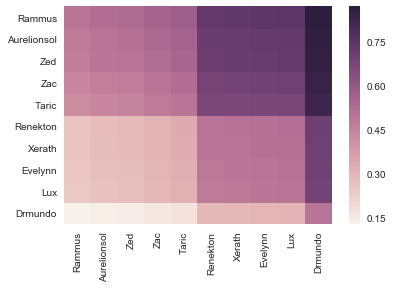

In [81]:
%matplotlib inline
sns.heatmap(df_ab)

In [11]:
heros = list(set(one for one in chain.from_iterable([row for _, row in df10.iterrows()])))
len(heros)
heros

[0L,
 1L,
 u'MonkeyKing',
 u'Jax',
 u'Shaco',
 u'Warwick',
 u'Nidalee',
 u'Zyra',
 u'Kled',
 u'Brand',
 u'Rammus',
 u'Illaoi',
 u'Corki',
 u'Braum',
 u'Sejuani',
 u'MissFortune',
 u'Blitzcrank',
 u'Yorick',
 u'Xerath',
 u'Sivir',
 u'Riven',
 u'Orianna',
 u'Gangplank',
 u'Malphite',
 u'Poppy',
 u'Karthus',
 u'Jayce',
 u'Nunu',
 u'Trundle',
 u'Graves',
 u'Lucian',
 u'Gnar',
 u'Lux',
 u'Shyvana',
 u'Renekton',
 u'Darius',
 u'XinZhao',
 u'Jinx',
 u'Kalista',
 u'Fizz',
 u'Kassadin',
 u'Sona',
 u'Vladimir',
 u'Viktor',
 u'Kindred',
 u'Cassiopeia',
 u'Maokai',
 u'Thresh',
 u'Kayle',
 u'Hecarim',
 u'Khazix',
 u'Olaf',
 u'Ziggs',
 u'Syndra',
 u'DrMundo',
 u'Karma',
 u'Annie',
 u'Akali',
 u'Leona',
 u'Yasuo',
 u'Kennen',
 u'Rengar',
 u'Ryze',
 u'Shen',
 u'Zac',
 u'Pantheon',
 u'Swain',
 u'Bard',
 u'Sion',
 u'Vayne',
 u'Nasus',
 u'Fiddlesticks',
 u'TwistedFate',
 u'Chogath',
 u'Udyr',
 u'Morgana',
 u'Ivern',
 u'Volibear',
 u'Caitlyn',
 u'Anivia',
 u'Nocturne',
 u'Zilean',
 u'Azir',
 u'Rumble',
 u

In [ ]:
def fun(row):
    new_row = np.zeros(263)
    if row['bResult']==1 :
        new_row[heros.index(row[0])] = 1
        new_row[heros.index(row[1])] = 1
        new_row[heros.index(row[2])] = 1
        new_row[heros.index(row[3])] = 1
        new_row[heros.index(row[4])] = 1
        new_row[heros.index(row[5]) + 131] =-1
        new_row[heros.index(row[6]) + 131] =-1
        new_row[heros.index(row[7]) + 131] =-1
        new_row[heros.index(row[8]) + 131] =-1
        new_row[heros.index(row[9]) + 131] =-1
    return new_row